In [2]:
import json, os, tqdm

dataset_json_path = '/data2/chence/PanoHeadData/single_view_hq/dataset.json'
khs_train_paths = {}
khs_val_paths = {}
ours_paths = {}
with open(dataset_json_path, 'r') as f:
    dataset = json.load(f)

not_shown_ours = True
not_shown_khs = True
for image_name, image_meta in tqdm.tqdm(dataset.items()):
    source = image_meta['data_source']
    if source == 'OCD/Original':
        ours_paths[image_name] = image_meta['align_image_path']
    elif source == 'K-Hairstyle/Validation':
        new_path = image_meta['align_image_path'].replace('align_images', 'validation_labels')
        if new_path.endswith('._00.png'): 
            new_path = new_path.replace('._00.png', '.json')
        else:
            new_path = new_path.replace('_00.png', '.json')
        new_path = new_path.replace('-', '_')
        khs_val_paths[image_name] = new_path
    elif source == 'K-Hairstyle/Training':
        new_path = image_meta['align_image_path'].replace('align_images', 'training_labels')
        if new_path.endswith('._00.png'): 
            new_path = new_path.replace('._00.png', '.json')
        else:
            new_path = new_path.replace('_00.png', '.json')
        new_path = new_path.replace('-', '_')
        khs_train_paths[image_name] = new_path


100%|██████████| 404524/404524 [00:00<00:00, 945887.26it/s] 


In [13]:
vis_num = 10
label_root_dir = '/data3/khs_labels/'
attr_name = 'length'

attrs = set()
attr_samples = {}
# sides = set()
# side_samples= {}
# hairstyles = set()
# exceptionals = set()
# hairstyle_samples = {}
# exceptional_samples = {}
# for k, v in tqdm.tqdm(khs_val_paths.items()):
#     abs_path = os.path.join(label_root_dir, v)
#     with open(abs_path, 'r') as f:
#         label = json.load(f)
#         exceptional = label['exceptional']
#         if not(exceptional == '해당없음'): continue
#         hairstyle = label['basestyle']
#         hairstyles.add(hairstyle)
#         if hairstyle not in hairstyle_samples:
#             hairstyle_samples[hairstyle] = [k]
#         else:
#             hairstyle_samples[hairstyle].append(k)
# for k, v in tqdm.tqdm(khs_train_paths.items()):
#     abs_path = os.path.join(label_root_dir, v)
#     with open(abs_path, 'r') as f:
#         label = json.load(f)
#         exceptional = label['exceptional']
#         if not(exceptional == '해당없음'): continue
#         hairstyle = label['basestyle']
#         hairstyles.add(hairstyle)
#         if hairstyle not in hairstyle_samples:
#             hairstyle_samples[hairstyle] = [k]
#         else:
#             hairstyle_samples[hairstyle].append(k)
for k, v in tqdm.tqdm(khs_val_paths.items()):
    abs_path = os.path.join(label_root_dir, v)
    with open(abs_path, 'r') as f:
        label = json.load(f)
        attr = label[attr_name]
        attrs.add(attr)
        if attr not in attr_samples:
            attr_samples[attr] = [k]
        else:
            attr_samples[attr].append(k)
for k, v in tqdm.tqdm(khs_train_paths.items()):
    abs_path = os.path.join(label_root_dir, v)
    with open(abs_path, 'r') as f:
        label = json.load(f)
        attr = label[attr_name]
        attrs.add(attr)
        if attr not in attr_samples:
            attr_samples[attr] = [k]
        else:
            attr_samples[attr].append(k)
print(f'Number of attributes: {len(attr_samples)}')
for attr_cat, attr_val in attr_samples.items():
    print(f'Attribute {attr_cat}: Numbers {len(attr_val)}')

  2%|▏         | 280/11931 [00:00<00:04, 2796.26it/s]

100%|██████████| 109816/109816 [00:36<00:00, 3006.79it/s]

Number of attributes: 5
Attribute 단발: Numbers 26279
Attribute 장발: Numbers 36671
Attribute 중발: Numbers 16444
Attribute 남자: Numbers 35857
Attribute 여숏: Numbers 6496


In [16]:
for attr_cat, attr_val in attr_samples.items():
    print(f'{attr_cat}')

단발
장발
중발
남자
여숏


Samples of 단발
0: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135759.jpg
1: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135819.jpg
2: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135883.jpg
3: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136323.jpg
4: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136707.jpg
5: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136757.jpg
6: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136807.jpg
7: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137496.jpg
8: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137546.jpg
9: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137596.jpg
10: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137835.jpg
11: /data2/chence/PanoHeadData/single_view_hq/align_images/00140/img00140414.jpg
12: /data2/chence/PanoHe

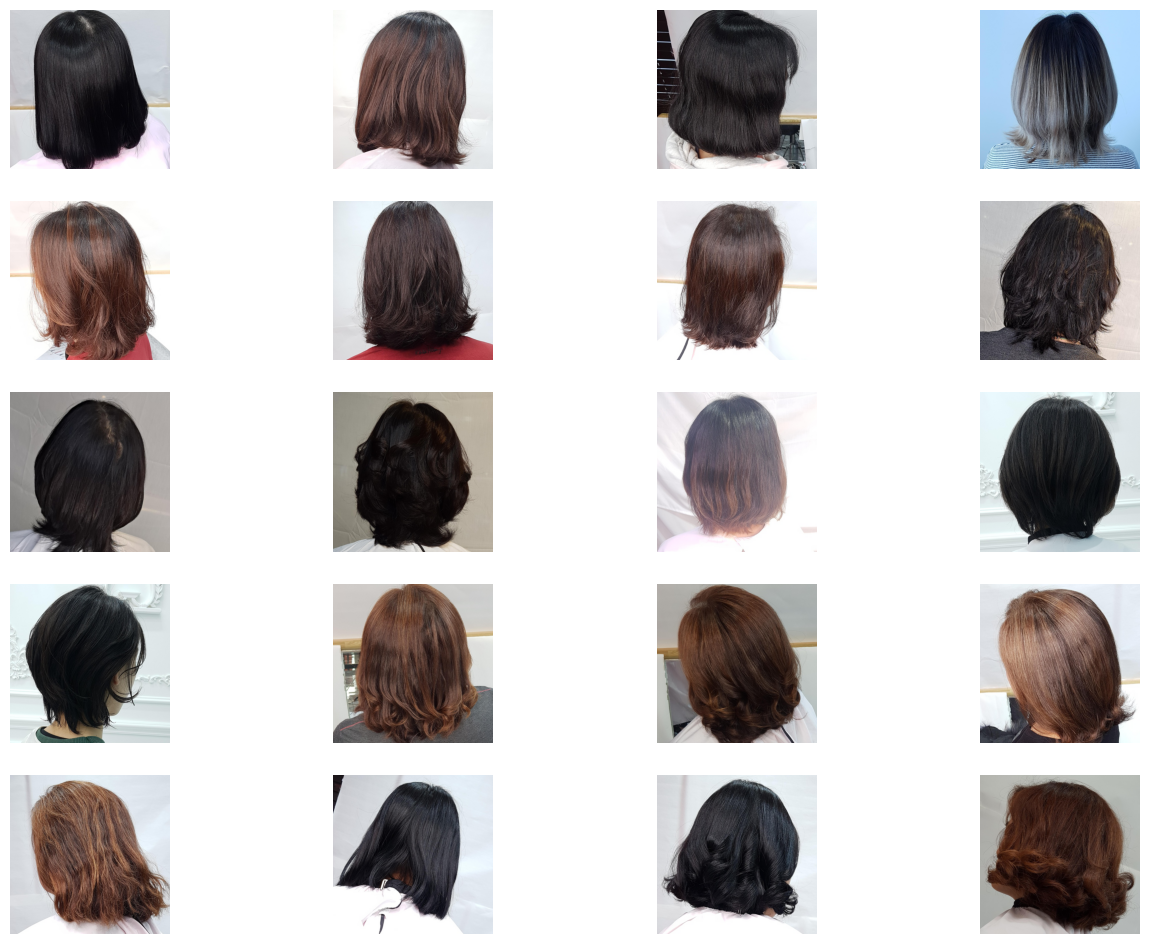

Samples of 장발
0: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135796.jpg
1: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136945.jpg
2: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137042.jpg
3: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137092.jpg
4: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137142.jpg
5: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137209.jpg
6: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137259.jpg
7: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137339.jpg
8: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137389.jpg
9: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137439.jpg
10: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137671.jpg
11: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137747.jpg
12: /data2/chence/PanoHe

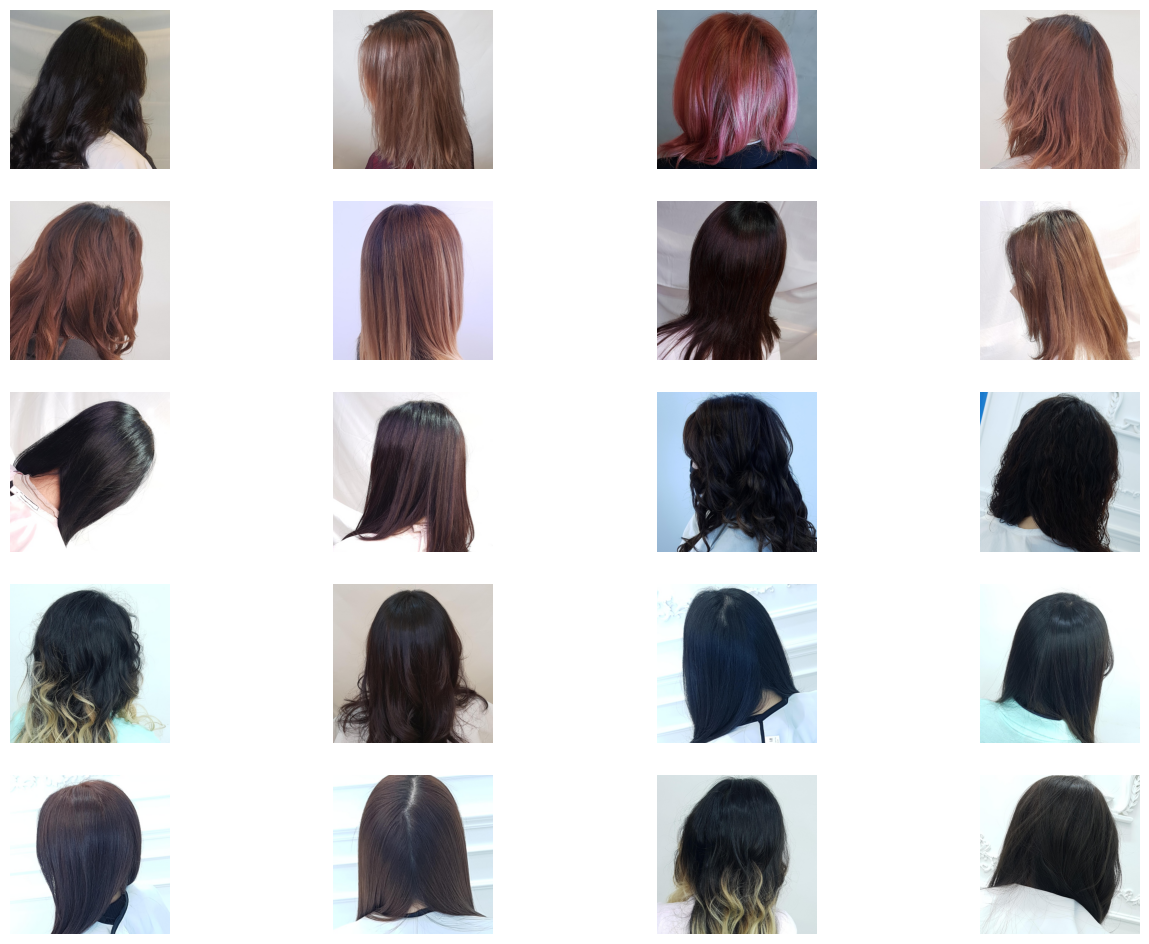

Samples of 중발
0: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135884.jpg
1: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136363.jpg
2: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136454.jpg
3: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136504.jpg
4: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136554.jpg
5: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136604.jpg
6: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136654.jpg
7: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136828.jpg
8: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136878.jpg
9: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136976.jpg
10: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137309.jpg
11: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137609.jpg
12: /data2/chence/PanoHe

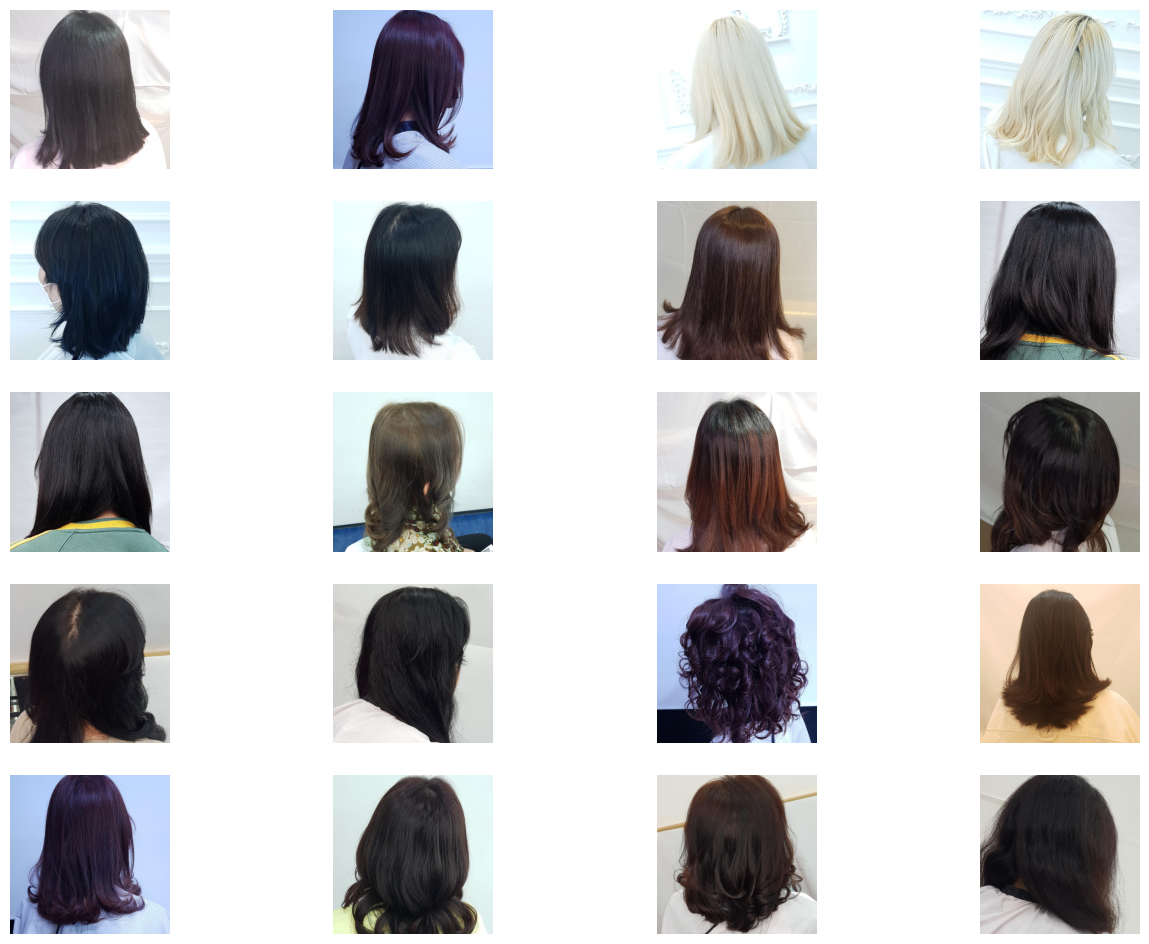

Samples of 남자
0: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135915.jpg
1: /data2/chence/PanoHeadData/single_view_hq/align_images/00135/img00135965.jpg
2: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136015.jpg
3: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136065.jpg
4: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136115.jpg
5: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136191.jpg
6: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136241.jpg
7: /data2/chence/PanoHeadData/single_view_hq/align_images/00136/img00136291.jpg
8: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137870.jpg
9: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137920.jpg
10: /data2/chence/PanoHeadData/single_view_hq/align_images/00137/img00137970.jpg
11: /data2/chence/PanoHeadData/single_view_hq/align_images/00138/img00138020.jpg
12: /data2/chence/PanoHe

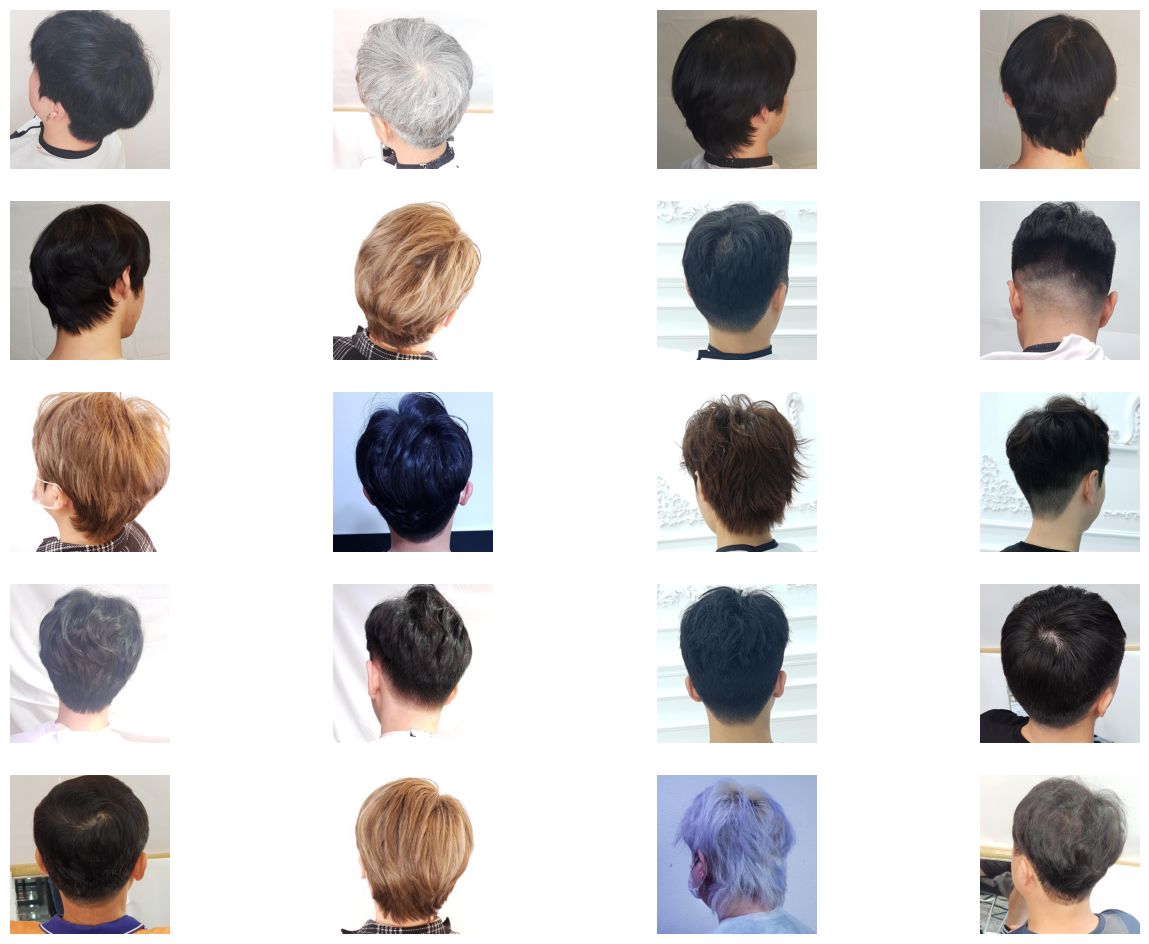

Samples of 여숏
0: /data2/chence/PanoHeadData/single_view_hq/align_images/00139/img00139588.jpg
1: /data2/chence/PanoHeadData/single_view_hq/align_images/00140/img00140719.jpg
2: /data2/chence/PanoHeadData/single_view_hq/align_images/00140/img00140805.jpg
3: /data2/chence/PanoHeadData/single_view_hq/align_images/00141/img00141954.jpg
4: /data2/chence/PanoHeadData/single_view_hq/align_images/00142/img00142638.jpg
5: /data2/chence/PanoHeadData/single_view_hq/align_images/00142/img00142688.jpg
6: /data2/chence/PanoHeadData/single_view_hq/align_images/00142/img00142738.jpg
7: /data2/chence/PanoHeadData/single_view_hq/align_images/00142/img00142788.jpg
8: /data2/chence/PanoHeadData/single_view_hq/align_images/00142/img00142838.jpg
9: /data2/chence/PanoHeadData/single_view_hq/align_images/00142/img00142919.jpg
10: /data2/chence/PanoHeadData/single_view_hq/align_images/00143/img00143012.jpg
11: /data2/chence/PanoHeadData/single_view_hq/align_images/00143/img00143062.jpg
12: /data2/chence/PanoHe

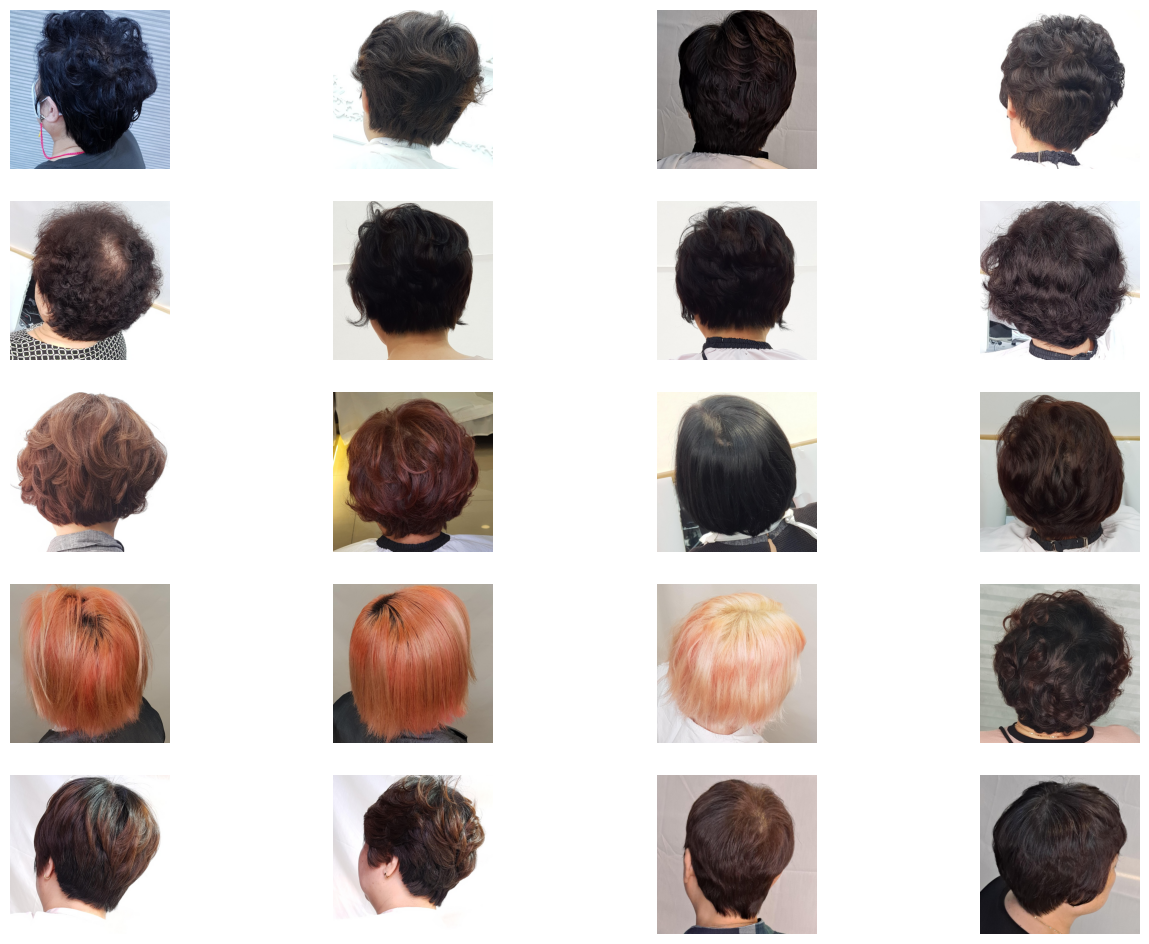

In [19]:
# Visualize some basestyles given that exceptional is 해당없음
from IPython.display import display
from matplotlib import pyplot as plt
from PIL import Image
image_root_dir = '/data2/chence/PanoHeadData/single_view_hq/align_images'
num_vis = 20
for k, v in attr_samples.items():
    print(f'Samples of {k}')
    vised = 0
    fig, axs = plt.subplots(5, 4, figsize=(16, 12))
    axs = axs.flatten()
    for _v in attr_samples[k][::50]:
        image_path = os.path.join(image_root_dir, _v.replace('png', 'jpg'))
        image = Image.open(image_path)
        print(f'{vised}: {image_path}')
        axs[vised].imshow(image)
        axs[vised].axis('off')
        vised += 1
        if num_vis == vised: 
            plt.show()
            break

In [ ]:
from IPython.display import display
from matplotlib import pyplot as plt
from PIL import Image
plt.rcParams['font.family'] = 'DejaVu Sans'
image_root_dir = '/data2/chence/PanoHeadData/single_view_hq/align_images'
for k, v in hairstyle_samples.items():
    v = v.replace('png', 'jpg')
    image_path = os.path.join(image_root_dir, v)
    image = Image.open(image_path)
    print(k)
    # specify height and width of figure in pixels
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()

In [20]:
for k, v in exceptional_samples.items():
    v = v.replace('png', 'jpg')
    image_path = os.path.join(image_root_dir, v)
    image = Image.open(image_path)
    print(k)
    # specify height and width of figure in pixels
    # plt.figure(figsize=(2,2))
    # plt.imshow(image)
    # plt.show()

해당없음
묶음머리
넘긴머리
악성곱슬머리
땋은머리
기타악세사리
군인머리(반삭)
기타


In [22]:
suspected_samples = {
    '해당없음': [],
    '묶음머리': [],
    '넘긴머리': [],
    '악성곱슬머리': [],
    '땋은머리': [],
    '기타악세사리': [],
    '군인머리(반삭)': [],
    '기타': []
}
for k, v in tqdm.tqdm(khs_val_paths.items()):
    abs_path = os.path.join(label_root_dir, v)
    with open(abs_path, 'r') as f:
        label = json.load(f)
        exceptional = label['exceptional']
        if exceptional in suspected_samples.keys():
            suspected_samples[exceptional].append(k)
for k, v in tqdm.tqdm(khs_train_paths.items()):
    abs_path = os.path.join(label_root_dir, v)
    with open(abs_path, 'r') as f:
        label = json.load(f)
        exceptional = label['exceptional']
        if exceptional in suspected_samples.keys():
            suspected_samples[exceptional].append(k)
for k, v in suspected_samples.items():
    print(k, len(v))

  4%|▍         | 511/11931 [00:00<00:04, 2560.86it/s]

100%|██████████| 109816/109816 [00:46<00:00, 2338.92it/s]

해당없음 107026
묶음머리 6673
넘긴머리 5351
악성곱슬머리 656
땋은머리 960
기타악세사리 758
군인머리(반삭) 227
기타 96


In [ ]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-11-12 16:12:08
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2023-11-14 13:59:04
FilePath: /DatProc/X10.get_ours_and_khs.ipynb
Description: 

Copyright (c) 2023 by ${git_name_email}, All Rights Reserved. 
'''
for k in suspected_samples.keys():
    if k != '해당없음': continue
    print(f'Samples of {k}')
    num_vis = 10
    for _v in suspected_samples[k][::40]:
        image_path = os.path.join(image_root_dir, _v.replace('png', 'jpg'))
        print(image_path)
        image = Image.open(image_path)
        plt.figure(figsize=(2,2))
        plt.imshow(image)
        plt.show()
        num_vis -= 1
        if num_vis == 0: break


In [ ]:
# read dataset.json
import json, os, tqdm

delete_items = []
label_root_dir = '/data3/khs_labels/'
dataset_json_path = '/data2/chence/PanoHeadData/single_view_hq/dataset.json'
suspected_samples = ['기타악세사리', '땋은머리']

print(f'Loading present dataset meta from: {dataset_json_path}')
with open(dataset_json_path, 'r') as f:
    dataset = json.load(f)

# get datasource
print(f'Filtering KHS data...')
pbar = tqdm.tqdm(dataset.items())
for image_name, image_meta in pbar:
    source = image_meta['data_source']
    if not(source.startswith('K-Hairstyle')): continue
    path_label = 'validation_labels' if source == 'K-Hairstyle/Validation' else 'training_labels'
    new_path = image_meta['align_image_path'].replace('align_images', path_label)
    new_path = new_path.replace('._00.png', '.json') if new_path.endswith('._00.png') else new_path.replace('_00.png', '.json')
    new_path = new_path.replace('-', '_')
    abs_path = os.path.join(label_root_dir, new_path)
    pbar.set_description(f'Processing {new_path}')
    with open(abs_path, 'r') as f:
        label = json.load(f)
        exceptional = label['exceptional']
        if exceptional in suspected_samples:
            delete_items.append(image_name)

print(f'In total: {len(delete_items)} items to be deleted.')


In [1]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-11-14 00:15:44
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2023-11-14 01:10:58
FilePath: /DatProc/X10.remove_unwanted_khs.py
Description: 

Copyright (c) 2023 by ${git_name_email}, All Rights Reserved. 
'''
# read dataset.json
import json, os, tqdm

ours_delete = []
khs_delete = []
label_root_dir = '/data3/khs_labels/'
dataset_json_path = '/data2/chence/PanoHeadData/multi_view_hq/dataset.json'
suspected_samples = ['기타악세사리', '땋은머리']
samples = [(1224, 7), (3102, 0), (3929, 0), (4033, 0), (4032,3), (4288, 2), (4289, 0), (4473, 0)]

print(f'Loading present dataset meta from: {dataset_json_path}', end='...', flush=True)
with open(dataset_json_path, 'r') as f:
    dataset = json.load(f)
print(f'Done.')



Loading present dataset meta from: /data2/chence/PanoHeadData/multi_view_hq/dataset.json...Done.


In [ ]:
# get datasource
print(f'Filtering KHS data...')
pbar = tqdm.tqdm(samples)
for model_id, image_id in pbar:
    key = f'{model_id:05d}/img{image_id:08d}.png'
    assert key in dataset.keys()
    source = dataset[key]['data_source']
    path_label = 'validation_labels' if source == 'K-Hairstyle/Validation' else 'training_labels'
    new_path = dataset[key]['align_image_path'].replace('align_images', path_label)
    new_path = new_path.replace('._00.png', '.json') if new_path.endswith('._00.png') else new_path.replace('_00.png', '.json')
    new_path = new_path.replace('-', '_')
    abs_path = os.path.join(label_root_dir, new_path)
    pbar.set_description(f'Processing {new_path}')
    with open(abs_path, 'r') as f:
        label = json.load(f)
        style = label['basestyle']
        exceptional = label['exceptional']
        print(f'{key}:\n\tStyle:{style}\n\tExceptional:{exceptional}')
    pbar.update()


In [10]:
headings = 4
model_ids = set()
with open('./temp2.txt','r') as f:
    lines = f.readlines()
    for line in lines[headings:]:
        model_id = os.path.basename(os.path.dirname(line))
        model_ids.add(model_id) 
print(len(model_ids))

184
